F1 Score =  0.5649227398234256
F1 Score =  0.5831303428222274
F1 Score =  0.5802605251614139
F1 Score =  0.5784839133756445
F1 Score =  0.5769928031716618
F1 Score =  0.5750758977367589
F1 Score =  0.573951565816058
F1 Score =  0.5712765965642622
F1 Score =  0.5652645626937184
F1 Score =  0.5643488369976143
F1 Score =  0.5692656711659224
F1 Score =  0.5108777532542748
F1 Score =  0.5108777532542748
F1 Score =  0.5108520922382871
F1 Score =  0.5108563689149297
F1 Score =  0.5108663480489085
F1 Score =  0.5336943735155656
F1 Score =  0.5705439308667583
F1 Score =  0.42023944500342914
F1 Score =  0.4202451622996537
F1 Score =  0.3961041056945281
F1 Score =  0.3961041056945281
F1 Score =  0.3961041056945281
F1 Score =  0.3961041056945281
F1 Score =  0.3961041056945281
F1 Score =  0.3961041056945281
F1 Score =  0.3961041056945281


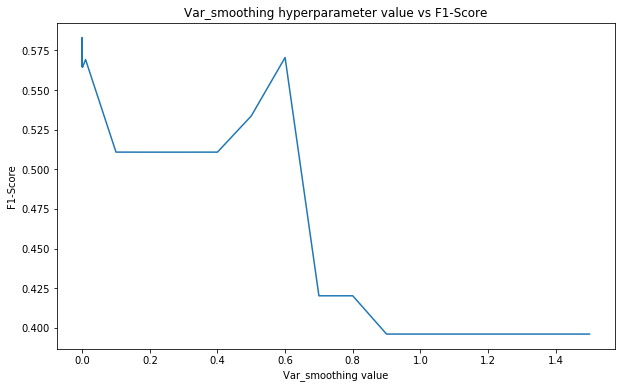

In [25]:
# Uses Gaussian Naive Bayes in order to show the effect of tuning hyperparameters
import kf_ml_lib as kf

import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

dataset_path = "../Datasets/ISOT Botnet 2010/Pre-processed/isot_botnet.csv"
dataset = kf.load_dataset(dataset_path)
X, y = kf.split_dataset(dataset, extended=False)

scoring = ['precision_macro', 'recall_macro']

f1_results = []
var_smoothing_options = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8,
                        1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2,
                        1e-1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                        0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]

for var_smoothing_value in var_smoothing_options:
    #rint("var_smoothing value = ", var_smoothing_value)
    
    gnb = GaussianNB(var_smoothing=var_smoothing_value)
    
    results = cross_validate(gnb, X, y, cv=10, scoring=scoring, n_jobs=8, verbose=0)

    fit_time = np.mean(results['fit_time'])
    precision = np.mean(results['test_precision_macro'])
    recall = np.mean(results['test_recall_macro'])
    f1_score = kf.calc_f1_score(precision, recall)
    
    f1_results.append(f1_score)

    #print(gnb)
    #print("Fit Time = ", fit_time)
    #print("Precision = ", precision)
    #print("Recall = ", recall)
    print("F1 Score = ", f1_score)

# x = hyperparameter value
# y = f1_score
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Var_smoothing hyperparameter value vs F1-Score")
ax.set_xlabel("Var_smoothing value")
ax.set_ylabel("F1-Score")

#for option_value, score in zip(var_smoothing_options, f1_results):
#    ax.scatter(option_value, score)

ax.plot(var_smoothing_options, f1_results)

plt.show()